## 1、运行方法一
运行以下代码

In [1]:
import numpy as np
from sklearn import cluster

# 压缩输入的图片
def compress_image(img, num_clusters):
    # Convert input image into (num_ samples, num_ features )
    # array to rung kmoane cluctoring algorithm
    X = img.reshape((-1, 1)) # 已保存到这台电脑
    # Run kmeans. on input data
    kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.squeeze()
    labels = kmeans.labels_
    # Assign each value to the nearest centroid and
    # reshape it to the original image shape
    input_image_compressed = np.choose(labels, centroids).reshape(img.shape)
    return input_image_compressed

In [2]:
import matplotlib.pyplot as plt

# ，定义画图函数
def plot_image(img, title,pos=111):
    vmin = img.min()
    vmax = img.max()
    plt.subplot(pos)
    plt.title(title)
    plt.imshow(img, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)


In [3]:
from PIL import Image

# 主函数
input_file="./data/flower_image.jpg" # 指定要加载的图片
def main(input_file, num_bits):
    if not 1 <= num_bits <= 8:
        raise TypeError('Number of bits should be between 1 and 8')

    num_clusters = np.power(2, num_bits)

    # Print compression rate
    compression_rate = round(100 * (8.0 - num_bits) / 8.0, 2)
    print("\nThe size of the image will be reduced by a factor of", 8.0 / num_bits)
    print("\nCompression rate = {}%".format(compression_rate))

    # Load input image
    input_image = np.array(Image.open(
        input_file).convert("F")).astype(np.uint8)
    # 加载输入图片
    plt.figure(figsize=(10, 30))
    plot_image(input_image, 'Original image', pos=121)

    # 输入不同的参数压缩图片
    input_image_compressed = compress_image(input_image, num_clusters)
    plot_image(input_image_compressed, 'Compressed image; compression rate ={}% '.format(
        compression_rate), pos=122)
    plt.show()



The size of the image will be reduced by a factor of 2.0

Compression rate = 50.0%


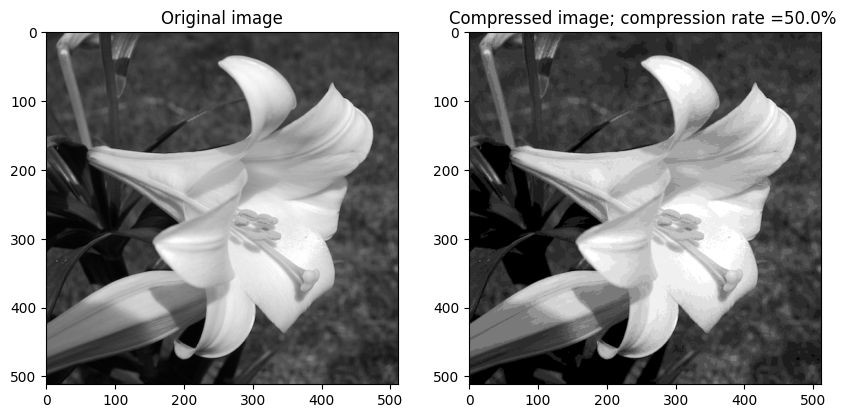

In [4]:
# 每个像素的压缩比特数降到4，再压缩图片
main(input_file=input_file,num_bits=4)


The size of the image will be reduced by a factor of 4.0

Compression rate = 75.0%


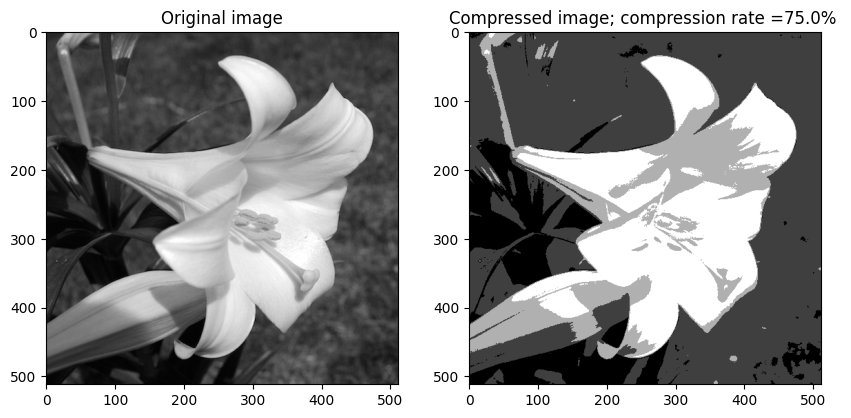

In [5]:
# 每个像素的压缩比特数降到2，再压缩图片
main(input_file=input_file,num_bits=2)


The size of the image will be reduced by a factor of 8.0

Compression rate = 87.5%


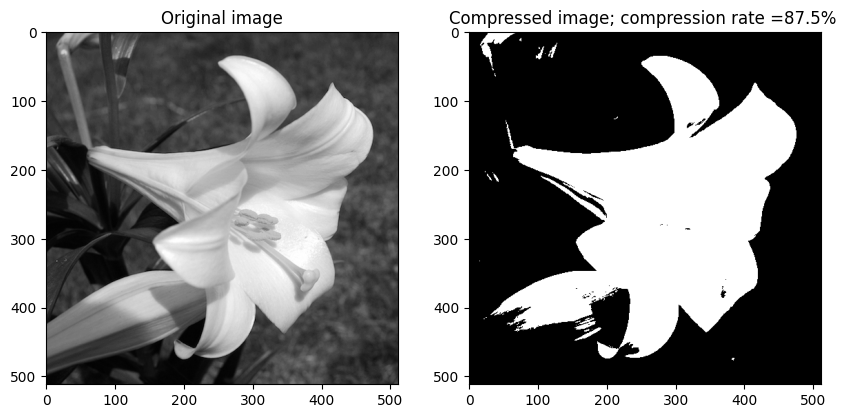

In [6]:
# 每个像素的压缩比特数降到1，可以看到只有黑白两种颜色的二进制图像
main(input_file=input_file,num_bits=1)

## 2、运行方法二
在终端中运行以下代码
* 每个像素的压缩比特数降到4，再压缩图片
```bash
python vector_quantization.py --input-file ./data/flower_image.jpg --num-bits 4
```

* 每个像素的压缩比特数降到2，再压缩图片
```bash
python vector_quantization.py --input-file ./data/flower_image.jpg --num-bits 2
```

* 每个像素的压缩比特数降到1，可以看到只有黑白两种颜色的二进制图像
```bash
python vector_quantization.py --input-file ./data/flower_image.jpg --num-bits 1
```